<a href="https://colab.research.google.com/github/priya-200/ROAD-SAFTY/blob/main/ROAD_SAFTY_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ROAD SAFTY DATASET

Dataset is extracted from openML platform which provide a large number of dataset for real time application

## IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import missingno as msno

## IMPORT DATASET

In [ ]:
from sklearn.datasets import fetch_openml

# Download the dataset from openml platform
dataset = fetch_openml(data_id=42803, as_frame=True)
df = dataset["frame"]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_arff_parser.py:400: DtypeWarning: Columns (0,29,31,33,51) have mixed types. Specify dtype option on import or set low_memory=False.
  frame = pd.read_csv(gzip_file, **read_csv_kwargs)


In [ ]:
df.sample(5)

Accident_Index  Vehicle_Reference_df_res  Vehicle_Type  \
292666  2015471503608                         1           9.0   
188439  2015320003057                         1           9.0   
347943  2015950000510                         2           2.0   
309859  2015520503478                         2           9.0   
8198    201501EO40870                         2          19.0   

        Towing_and_Articulation  Vehicle_Manoeuvre  \
292666                      0.0                7.0   
188439                      0.0               16.0   
347943                      0.0               18.0   
309859                      0.0               18.0   
8198                        0.0               15.0   

        Vehicle_Location-Restricted_Lane  Junction_Location  \
292666                               0.0                1.0   
188439                               0.0                0.0   
347943                               0.0                1.0   
309859                               0.0                1.0   
8198                                 0.0                1.0   

        Skidding_and_Overturning  Hit_Object_in_Carriageway  \
292666                       0.0                        0.0   
188439                       1.0                        0.0   
347943                       0.0                        0.0   
309859                       0.0                        0.0   
8198                         0.0                        0.0   

        Vehicle_Leaving_Carriageway  ...  Age_Band_of_Casualty  \
292666                          0.0  ...                  11.0   
188439                          0.0  ...                   4.0   
347943                          0.0  ...                   6.0   
309859                          0.0  ...                   7.0   
8198                            0.0  ...                   8.0   

        Casualty_Severity  Pedestrian_Location  Pedestrian_Movement  \
292666                  3                  0.0                  0.0   
188439                  3                  0.0                  0.0   
347943                  3                  0.0                  0.0   
309859                  3                  0.0                  0.0   
8198                    2                  0.0                  0.0   

        Car_Passenger  Bus_or_Coach_Passenger  \
292666            2.0                     0.0   
188439            0.0                     0.0   
347943            0.0                     0.0   
309859            0.0                     0.0   
8198              0.0                     0.0   

        Pedestrian_Road_Maintenance_Worker  Casualty_Type  \
292666                                 0.0              9   
188439                                 0.0              9   
347943                                 0.0              2   
309859                                 0.0              9   
8198                                   0.0              9   

        Casualty_Home_Area_Type  Casualty_IMD_Decile  
292666                      1.0                  4.0  
188439                      2.0                  9.0  
347943                      2.0                  NaN  
309859                      2.0                  9.0  
8198                        1.0                  4.0  

[5 rows x 67 columns]

## 1.STRUTURAL INFORMATION

In [ ]:
## Get the number of rows and columns in the dataset

df.shape

(363243, 67)

In [ ]:
## Investicate the columns in the dataset

df.columns

Index(['Accident_Index', 'Vehicle_Reference_df_res', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'Driver_Home_Area_Type', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Num

In [ ]:
## Count of the columns of particular datatype

pd.value_counts(df.dtypes)

<ipython-input-7-da47fd410a54>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df.dtypes)


float64    56
int64       6
object      5
Name: count, dtype: int64

### 1.1 STRUCTURE OF NON-NUMERIC DATA

In [ ]:
## See what how the non-numeric columns look

df.select_dtypes(include=['object']).describe()

Accident_Index        Date    Time Local_Authority_(Highway)  \
count          363243      319866  319822                    319866   
unique         140058         365    1439                       204   
top     201543P296025  14/02/2015   17:30                 E10000017   
freq             1332        2144    2972                      8457   

       LSOA_of_Accident_Location  
count                     298758  
unique                     25979  
top                    E01028497  
freq                        1456

### 1.2 STRUCTURE OF NUMERIC DATA

In [ ]:
## Get the description of the dataset which has numeric values

df.select_dtypes(include=['int64', 'float64']).describe()

Vehicle_Reference_df_res   Vehicle_Type  Towing_and_Articulation  \
count             363243.000000  363181.000000            362864.000000   
mean                   1.696203       9.756953                 0.029766   
std                    1.487094       8.315189                 0.294127   
min                    1.000000       1.000000                 0.000000   
25%                    1.000000       9.000000                 0.000000   
50%                    1.000000       9.000000                 0.000000   
75%                    2.000000       9.000000                 0.000000   
max                   37.000000      98.000000                 5.000000   

       Vehicle_Manoeuvre  Vehicle_Location-Restricted_Lane  Junction_Location  \
count      363059.000000                     363067.000000      363159.000000   
mean           12.607326                          0.109233           2.609361   
std             6.218689                          0.903131           3.249245   
min             1.000000                          0.000000           0.000000   
25%             6.000000                          0.000000           0.000000   
50%            17.000000                          0.000000           1.000000   
75%            18.000000                          0.000000           6.000000   
max            18.000000                          9.000000           8.000000   

       Skidding_and_Overturning  Hit_Object_in_Carriageway  \
count             363067.000000              363080.000000   
mean                   0.188139                   0.307480   
std                    0.714243                   1.595551   
min                    0.000000                   0.000000   
25%                    0.000000                   0.000000   
50%                    0.000000                   0.000000   
75%                    0.000000                   0.000000   
max                    5.000000                  12.000000   

       Vehicle_Leaving_Carriageway  Hit_Object_off_Carriageway  ...  \
count                363084.000000               363242.000000  ...   
mean                      0.366689                    0.546699  ...   
std                       1.374107                    2.094845  ...   
min                       0.000000                    0.000000  ...   
25%                       0.000000                    0.000000  ...   
50%                       0.000000                    0.000000  ...   
75%                       0.000000                    0.000000  ...   
max                       8.000000                   11.000000  ...   

       Age_Band_of_Casualty  Casualty_Severity  Pedestrian_Location  \
count         357674.000000      363243.000000        363241.000000   
mean               6.431284           2.875725             0.380731   
std                2.157860           0.355195             1.522220   
min                1.000000           1.000000             0.000000   
25%                5.000000           3.000000             0.000000   
50%                6.000000           3.000000             0.000000   
75%                8.000000           3.000000             0.000000   
max               11.000000           3.000000            10.000000   

       Pedestrian_Movement  Car_Passenger  Bus_or_Coach_Passenger  \
count        363241.000000  362481.000000           363197.000000   
mean              0.276467       0.281027                0.066127   
std               1.294574       0.591239                0.493174   
min               0.000000       0.000000                0.000000   
25%               0.000000       0.000000                0.000000   
50%               0.000000       0.000000                0.000000   
75%               0.000000       0.000000                0.000000   
max               9.000000       2.000000                4.000000   

       Pedestrian_Road_Maintenance_Worker  Casualty_Type  \
count                       363077.000000  363243.000000   
mean                

It is not quite easy to visualize the data like this so we can go for the graph values

<Axes: title={'center': 'Unique values in each features of the dataset'}>

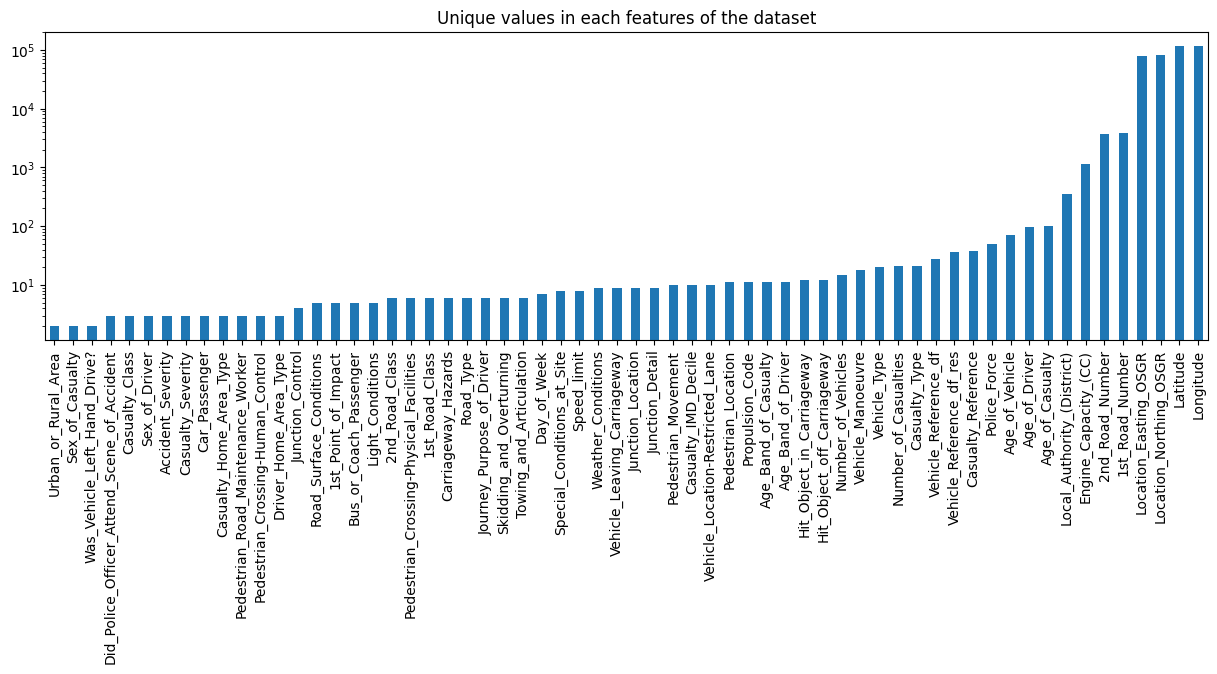

In [ ]:
unique_values = df.select_dtypes(include=['float64','int64']).nunique().sort_values()
unique_values.plot.bar(title = "Unique values in each features of the dataset",
                      figsize = (15,4),logy = True)

It is said that the column having
  <ul>2 unique values - binary feature</ul>
  <ul>3 - 10 unique values - ordinal features</ul>
  <ul>More than 10 - continueos features</ul>

In [ ]:
ordinal = []
binary = []
continues = []

for key,value in unique_values.items():
    if value == 2:
        binary.append(key)
    elif value <= 10:
        ordinal.append(key)
    else:
        continues.append(key)

In [ ]:
ordinal

['Did_Police_Officer_Attend_Scene_of_Accident',
 'Casualty_Class',
 'Sex_of_Driver',
 'Accident_Severity',
 'Casualty_Severity',
 'Car_Passenger',
 'Casualty_Home_Area_Type',
 'Pedestrian_Road_Maintenance_Worker',
 'Pedestrian_Crossing-Human_Control',
 'Driver_Home_Area_Type',
 'Junction_Control',
 'Road_Surface_Conditions',
 '1st_Point_of_Impact',
 'Bus_or_Coach_Passenger',
 'Light_Conditions',
 '2nd_Road_Class',
 'Pedestrian_Crossing-Physical_Facilities',
 '1st_Road_Class',
 'Carriageway_Hazards',
 'Road_Type',
 'Journey_Purpose_of_Driver',
 'Skidding_and_Overturning',
 'Towing_and_Articulation',
 'Day_of_Week',
 'Special_Conditions_at_Site',
 'Speed_limit',
 'Weather_Conditions',
 'Vehicle_Leaving_Carriageway',
 'Junction_Location',
 'Junction_Detail',
 'Pedestrian_Movement',
 'Casualty_IMD_Decile',
 'Vehicle_Location-Restricted_Lane']

In [ ]:
binary

['Urban_or_Rural_Area', 'Sex_of_Casualty', 'Was_Vehicle_Left_Hand_Drive?']

In [ ]:
continues

['Pedestrian_Location',
 'Propulsion_Code',
 'Age_Band_of_Casualty',
 'Age_Band_of_Driver',
 'Hit_Object_in_Carriageway',
 'Hit_Object_off_Carriageway',
 'Number_of_Vehicles',
 'Vehicle_Manoeuvre',
 'Vehicle_Type',
 'Number_of_Casualties',
 'Casualty_Type',
 'Vehicle_Reference_df',
 'Vehicle_Reference_df_res',
 'Casualty_Reference',
 'Police_Force',
 'Age_of_Vehicle',
 'Age_of_Driver',
 'Age_of_Casualty',
 'Local_Authority_(District)',
 'Engine_Capacity_(CC)',
 '2nd_Road_Number',
 '1st_Road_Number',
 'Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Latitude',
 'Longitude']

##2. Quality Investigation

This is about the missing values,duplicate values, unwanted values

### 2.1 DUPLICATED COLUMNS

In [ ]:
# Accedent_index in the dataset is unique for all rows. So by that all rows are unique from each other
# This is what shown in the result

df.duplicated().sum()

0

In [ ]:
# Now that we create a new dataframe by droping the Accident_Index we can actually find the actual duplicated values

df.drop(labels = ['Accident_Index'],axis = 1).duplicated().sum()

22

In [ ]:
## Drop the duplicated columns. But here too the same problem so we take the columns and pass as the parameter to the drop_duplicated() function

columns_selected = df.drop(labels = ["Accident_Index"],axis = 1).columns
df.drop_duplicates(subset = columns_selected,inplace = True)

In [ ]:
df.shape

(363221, 67)

### 2.2 MISSING VALUES

One of the common quality issue that we face is missing values. What we want to identify at this stage are big holes in the dataset, i.e. samples or features with a lot of missing values.

#### 2.2.1 MIISING VALUES PER SAMPLE

<Axes: >

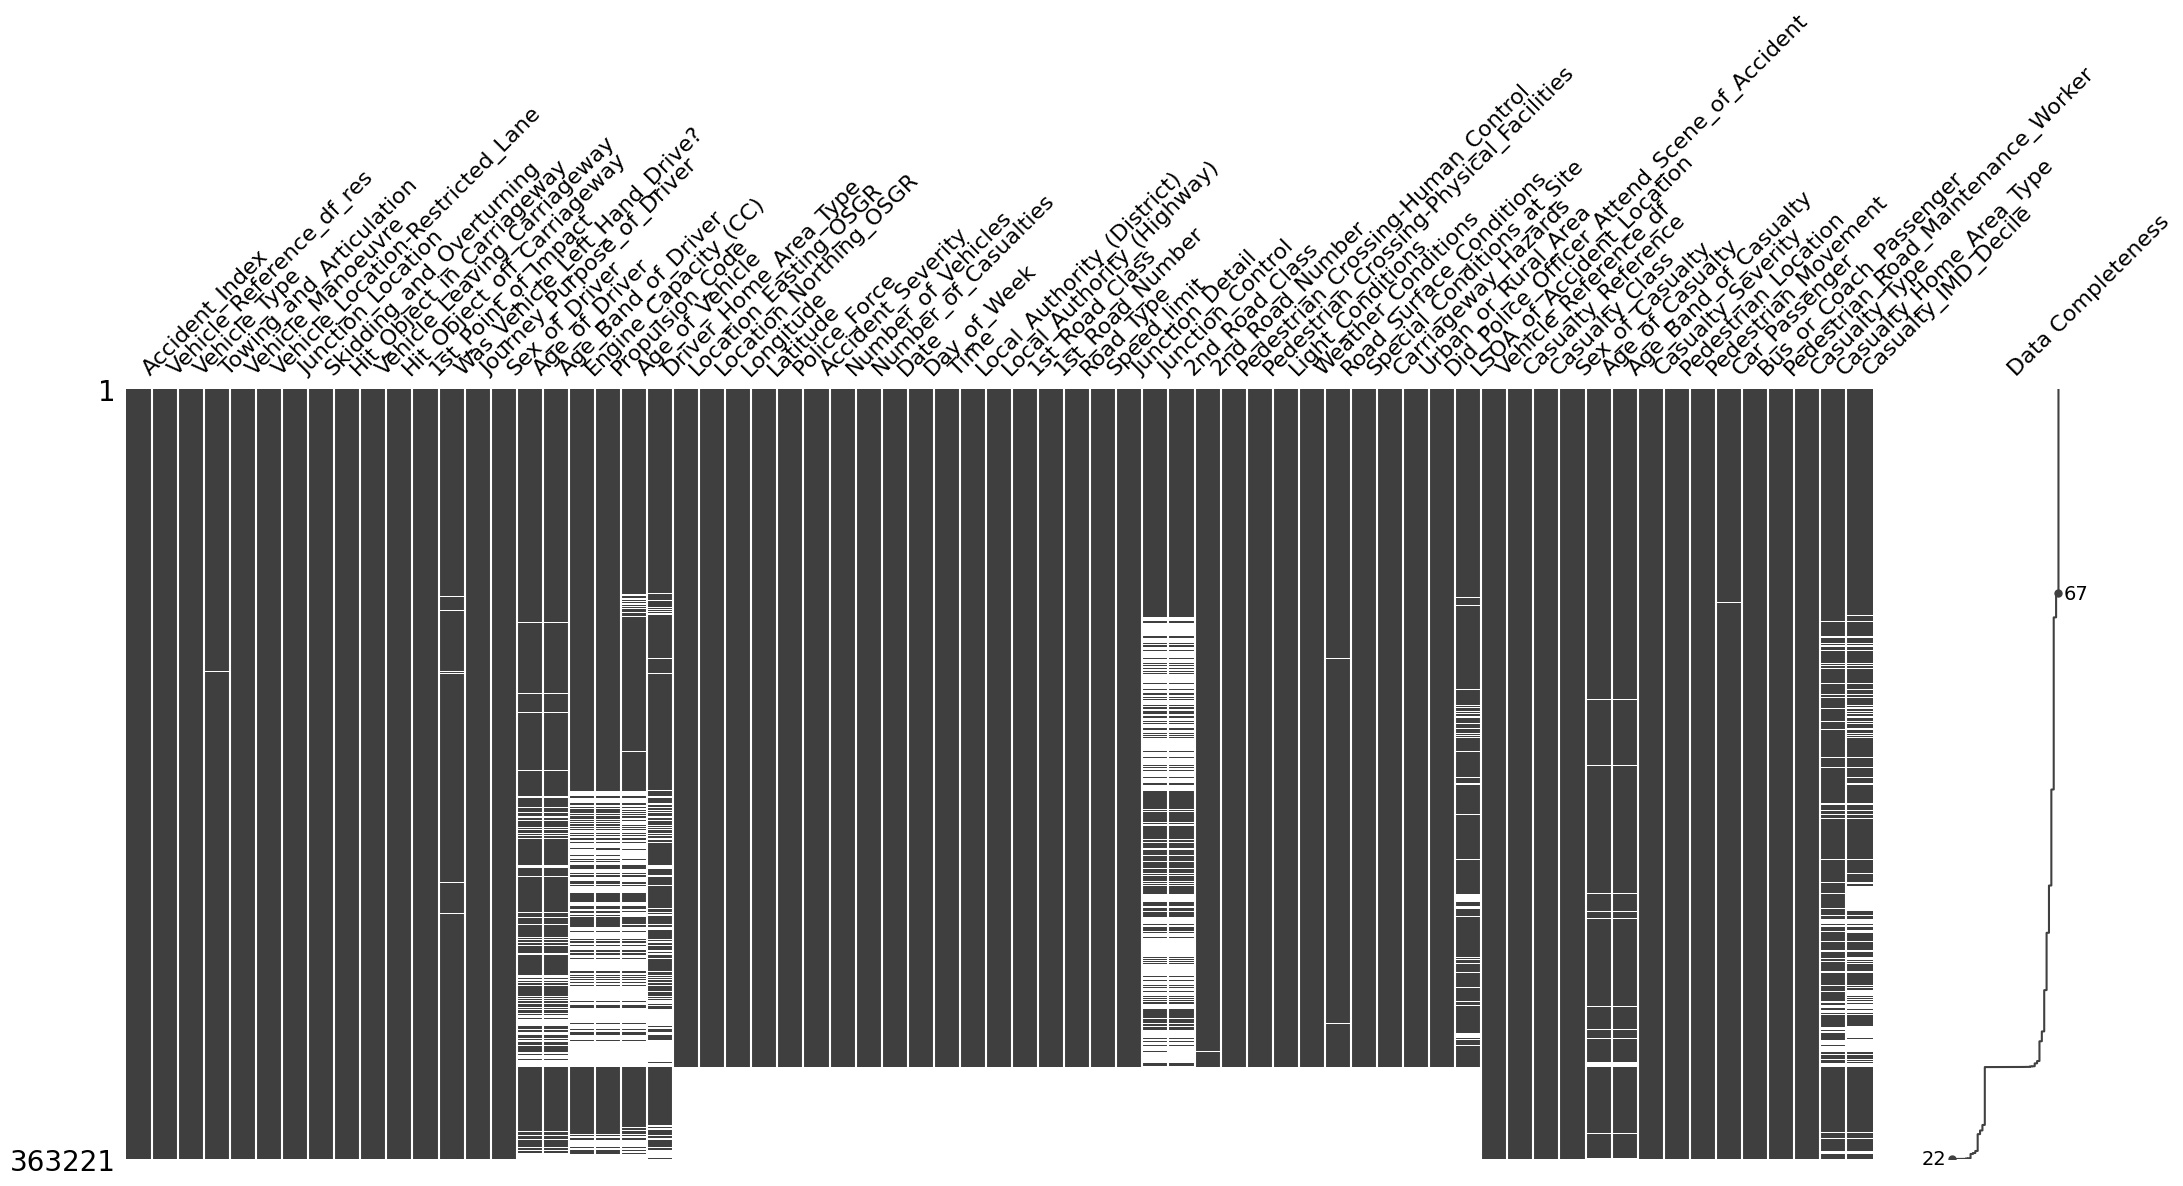

In [ ]:
msno.matrix(df,labels = True,sort = "descending")

There are many missing values in some of the columns. Some columns miss the sample around 50% of the features. For those samples filling the missing values with some replacement values is probably not a good idea.

<p> Therefore, let's drop the samples which have more than 20% of the missing values i.e., if a row contain more than 80% of columns as a Nan value</p>

<br>
<p>i.e.., That is a row having 8 or more null or nan values will be droped </p>

In [ ]:
df.shape

(363221, 67)

In [ ]:
df = df.dropna(thresh = df.shape[1] *0.80,axis = 0).reset_index(drop = True)
df.shape

(319790, 67)

#### 2.2.2 MISSING VALUES PER FEATURE

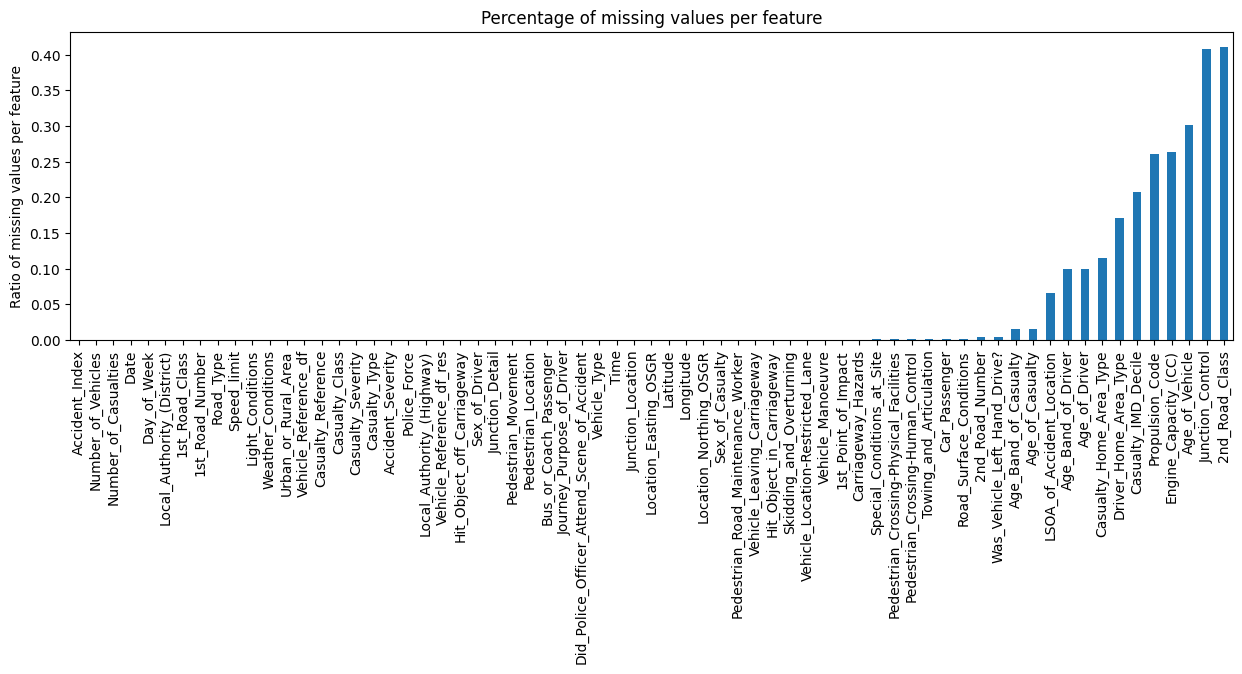

In [ ]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

Still there are feature where the missing values is around 50% of the data.So we go ahead and remove the fetures where there are lots of missing_values. More than 15% oof missing values

In [ ]:
df = df.dropna(thresh = df.shape[0] *0.85,axis = 1)
df.shape

(319790, 60)

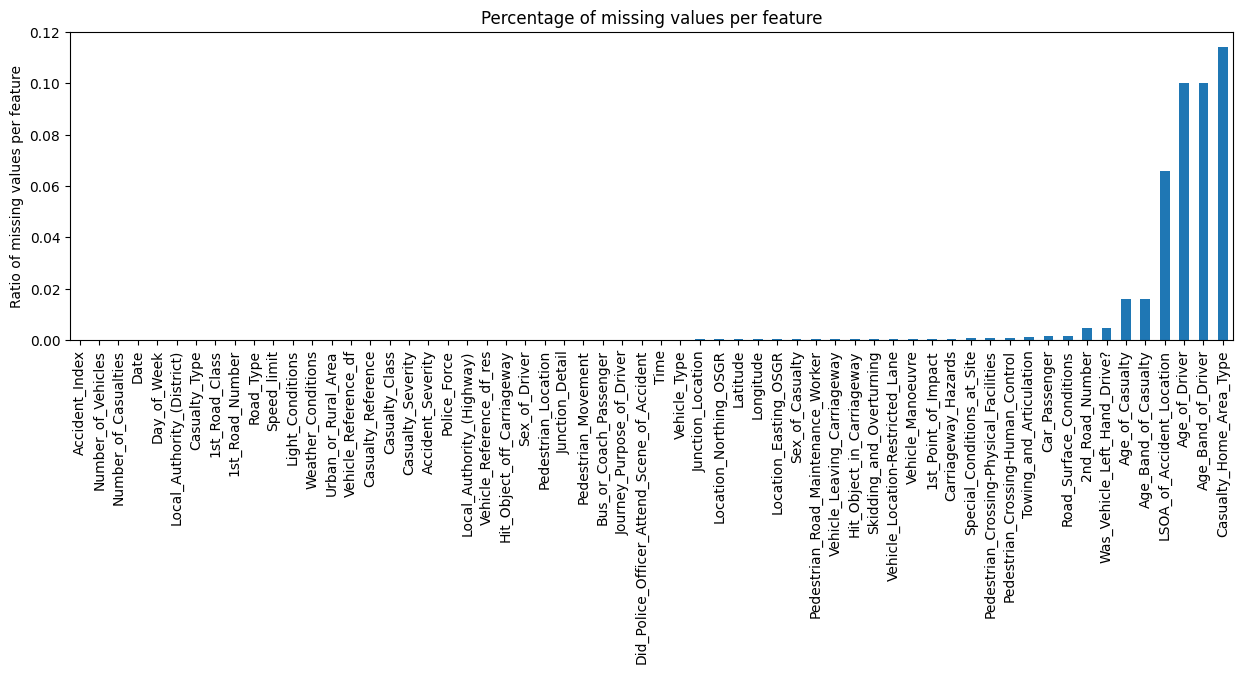

In [ ]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

### 2.3 UNWANTED ENTRIES AND RECORDINGS ERRORS

For example, a temperature recording of 45°C in Switzerland might be an outlier (as in 'very unusual'), while a recording at 90°C would be an error. Similarly, a temperature recording from the top of Mont Blanc might be physical possible, but most likely shouldn't be included in a dataset about Swiss cities.

### NUMERICAL FEATURES

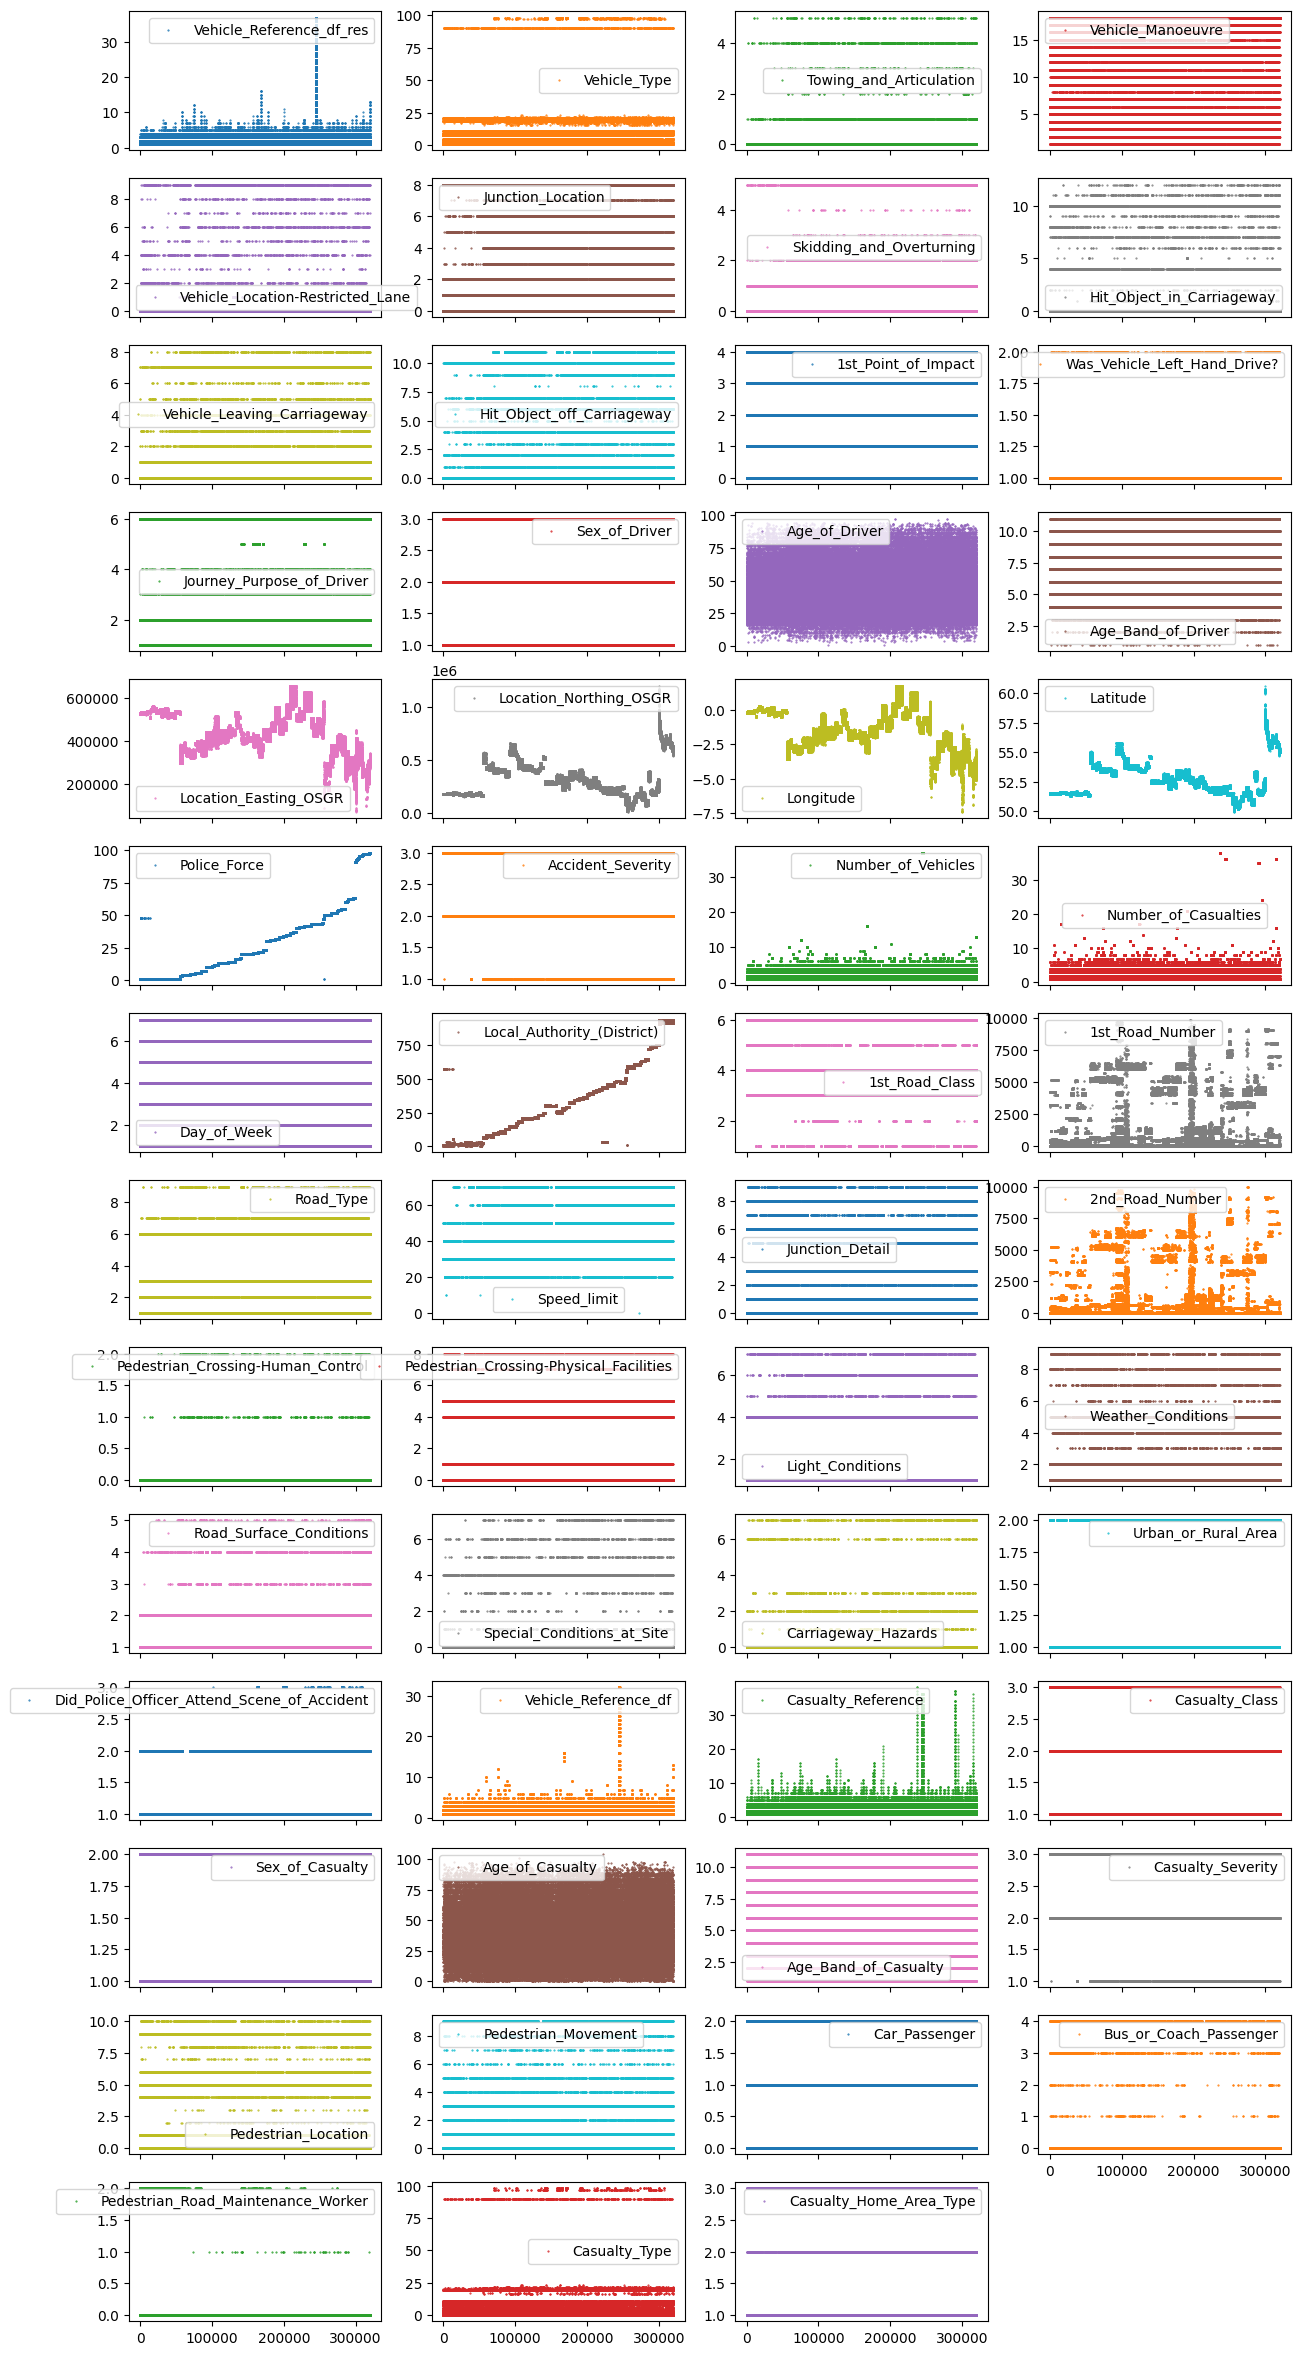

In [ ]:
df.plot(lw = 0,marker = ".",subplots = True, layout = (-1,4),
        figsize = (15,30),markersize = 1);

#### Dataset Plot Analysis

* **Categorical and Numerical Columns:**
    * The dataset includes both categorical and numerical columns. Categorical variables, such as `Vehicle_Type`, `Sex_of_Driver`, and `Weather_Conditions`, have a limited set of discrete values shown as horizontal lines where each line corresponds to a unique category.
    * Numerical columns, like `Longitude`, `Latitude`, `Location_Easting_OSGR`, and `Age_of_Driver`, have continuous distributions and a wider range of values shown by scattered points or lines.

* **Categorical Variables with Even Distributions:**
    * Some categorical columns show evenly distributed values across categories, like `Vehicle_Type` and `Day_of_Week`, suggesting that data collection across categories is relatively balanced.

* **Highly Imbalanced Categorical Variables:**
    * Certain columns have significant imbalances. For example:
        * `Was_Vehicle_Left_Hand_Drive?` is almost entirely one value, likely indicating that most vehicles are not left-hand drive.
        * `Sex_of_Driver` shows a gap (suggesting missing data) and appears to be imbalanced with one sex being more common.
        * `Urban_or_Rural_Area` has values primarily clustered around one level, likely indicating that most data points are from a single type of area.

* **Columns with Limited Unique Values:**
    * Columns like `Accident_Severity`, `Junction_Detail`, `Pedestrian_Crossing-Physical_Facilities`, and `Casualty_Class` have a limited number of unique values, shown by only a few distinct horizontal lines.

* **Columns with Apparent Missing Values:**
    * Columns with blank sections or irregular patterns within the scatter indicate missing data. For instance, `Age_of_Casualty` and `Pedestrian_Movement` have notable gaps, suggesting missing entries.

* **Continuous Columns with Specific Trends:**
    * `Location_Easting_OSGR` and `Location_Northing_OSGR` show clear trends, which could relate to specific geographic areas being overrepresented in the dataset.
    * `Longitude` and `Latitude` also show clustering within specific ranges, indicating that the incidents are mostly concentrated within certain regions.

* **Numerical Columns with Specific Clustering:**
    * `Age_of_Driver` and `Age_of_Casualty` both show dense clustering at certain ages, indicating that drivers and casualties of specific age groups are more common.
    * `Number_of_Vehicles` and `Number_of_Casualties` have values scattered along lower ranges, with some outliers indicating higher counts in certain incidents.

* **Sequential Columns:**
    * Columns like `1st_Road_Number` and `2nd_Road_Number` appear to be ordered or have values following a sequence, as they show more structured patterns, possibly representing road identifiers.

* **Sparsely Populated Categorical Columns:**
    * Columns like `Pedestrian_Road_Maintenance_Worker` and `Bus_or_Coach_Passenger` have limited non-zero entries, indicating that the values are sparse, likely representing rare cases.

* **Potential Outliers:**
    * `Casualty_Severity` and `Speed_limit` have outliers, as indicated by values far from the common clusters. This may imply rare but severe incidents or unusually high-speed limits.

* **Geographical Data Insights:**
    * The `Location_Easting_OSGR`, `Location_Northing_OSGR`, `Longitude`, and `Latitude` columns suggest that this dataset includes spatial information, potentially allowing for mapping incidents to specific locations.

* **Columns with Binary or Low-Cardinality Categories:**
    * Columns like `Did_Police_Officer_Attend_Scene_of_Accident`, `Was_Vehicle_Left_Hand_Drive?`, `Casualty_Class`, and `Urban_or_Rural_Area` appear to be binary or low-cardinality, shown by only two distinct levels (like 0 and 1).

* **Columns Showing Time or Date Information:**
    * `Day_of_Week` represents day-based information, suggesting that the dataset could include time-based analysis, though there isn’t a specific date column in this visualization.

* **High-Range Columns with Few Unique Values:**
    * `1st_Road_Number` and `2nd_Road_Number` show high numerical ranges but with few unique values, indicating they may represent categorical identifiers despite being high in range.

* **Columns Possibly Representing Severity or Impact:**
    * `Accident_Severity`, `Number_of_Vehicles`, and `Number_of_Casualties` likely relate to the severity or scale of each incident. They contain a range of values, possibly indicating variations in the impact of each recorded incident.

* **High Dimensionality of the Dataset:**
    * There is a significant number of columns, suggesting that this dataset captures multiple aspects of each incident. This could enable comprehensive multivariate analysis.

* **Presence of Columns with Temporal Information:**
    * Although this plot doesn't directly show time, columns like `Day_of_Week` could facilitate time-based analysis, especially if combined with a date or time column that might exist outside this plot.

* **Columns with Geographic Identifiers:**
    * `Local_Authority_(District)` shows a gradient pattern, likely due to ordered identifiers. This column might represent specific administrative regions.

* **Demographic Information:**
    * Columns like `Age_of_Driver`, `Age_Band_of_Driver`, `Age_of_Casualty`, and `Sex_of_Driver` indicate the inclusion of demographic data, which can help analyze patterns related to age and gender.

* **Variables Related to Road Conditions:**
    * Columns such as `Road_Type`, `Speed_limit`, `Weather_Conditions`, `Light_Conditions`, `Road_Surface_Conditions`, and `Pedestrian_Crossing-Physical_Facilities` pertain to road and environmental factors that may affect accident rates.

* **Accident and Casualty Information:**
    * `Casualty_Severity`, `Casualty_Class`, `Casualty_Type`, and `Number_of_Casualties` give specific insights about casualties in each accident, suggesting that this dataset is focused on traffic incidents and their impact on individuals.

* **Columns with Grouped Values:**
    * Certain columns, like `Vehicle_Reference_df`, `Vehicle_Reference_df_res`, and `Casualty_Reference`, seem to represent identifiers or groupings, as they have integer values clustered around specific points.


### 2.3.2 NON-NUMERICAL FEATURES

Identifying the unwanted entries and recording error on non numerical data is a bit more tricky. So we only want to investigate the genral quality of the dataset.

In [ ]:
df.describe(include = 'object')

Accident_Index        Date    Time Local_Authority_(Highway)  \
count          319790      319790  319746                    319790   
unique         123646         365    1439                       204   
top     201543P296025  14/02/2015   17:30                 E10000017   
freq             1332        2144    2969                      8457   

       LSOA_of_Accident_Location  
count                     298693  
unique                     25977  
top                    E01028497  
freq                        1456

## 3. CONTENT INVESTIGATION

###3.1. FEATURE DISTRIBUTIONS

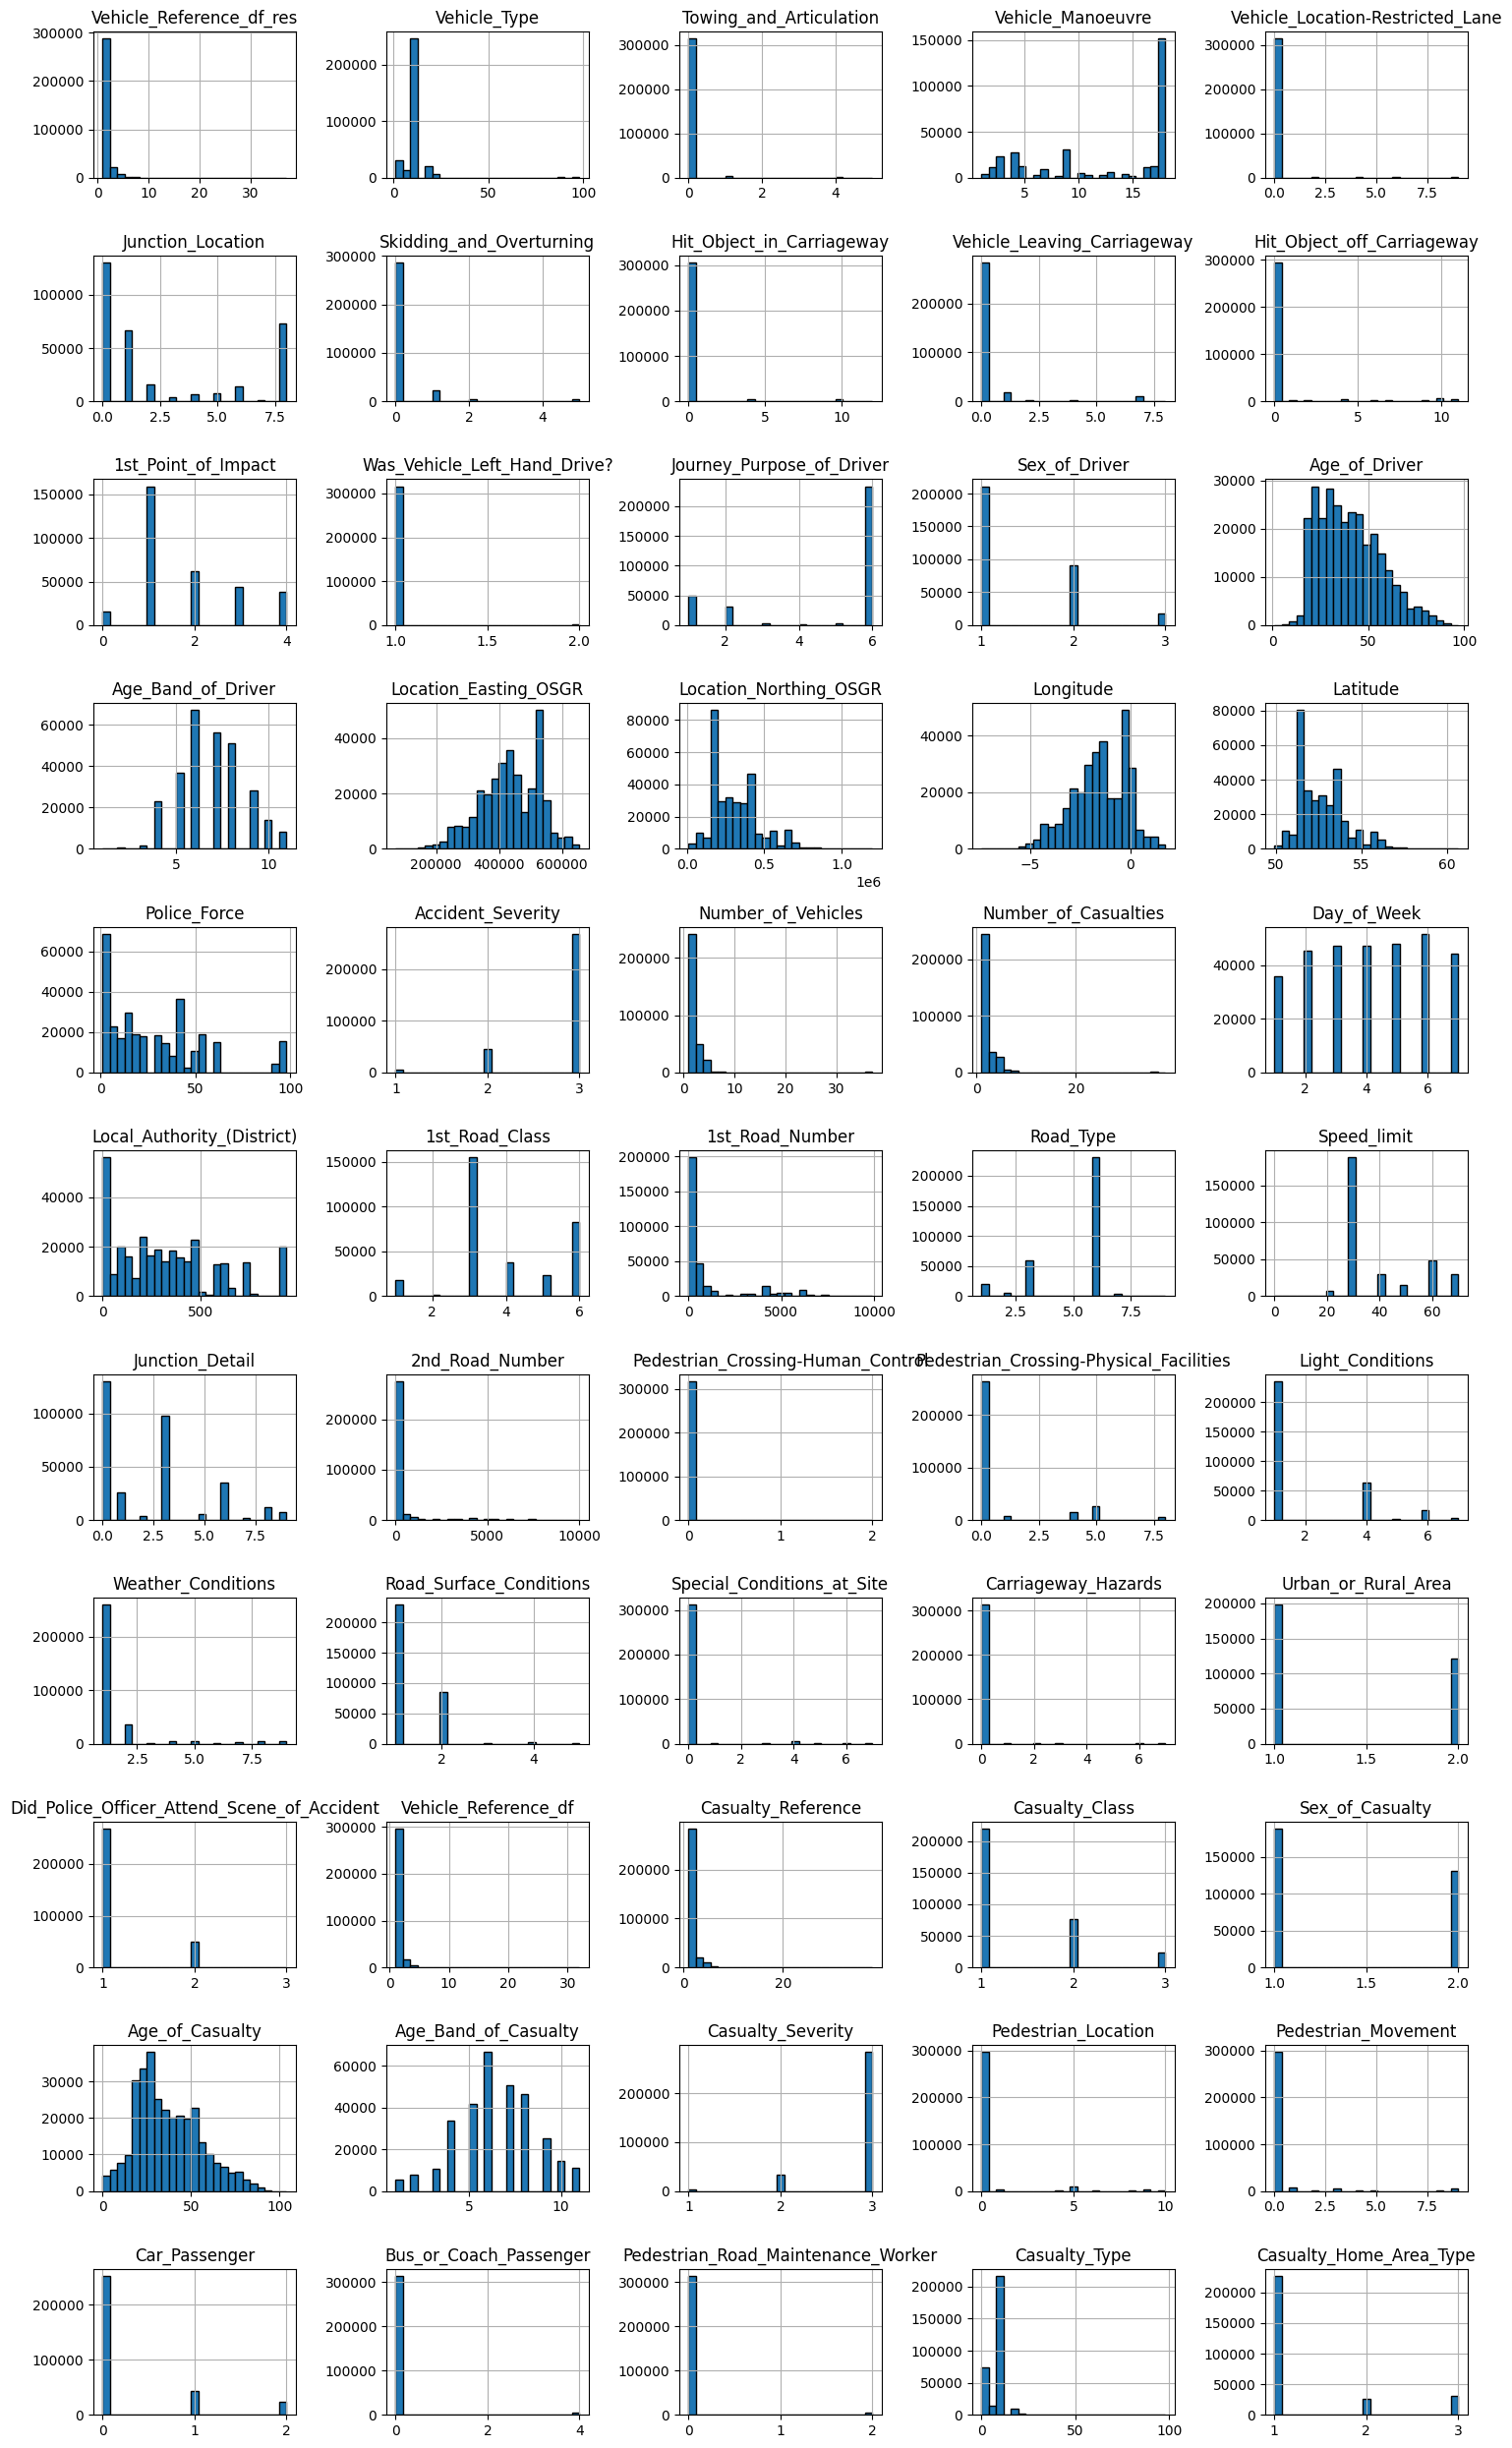

In [ ]:
df.hist(bins = 25,figsize = (15,25),layout = (-1,5),edgecolor = "black")
plt.tight_layout()

In [ ]:
most_frequent_entry = df.mode()
most_frequent_entry.T

0
Accident_Index                               201543P296025
Vehicle_Reference_df_res                                 1
Vehicle_Type                                           9.0
Towing_and_Articulation                                0.0
Vehicle_Manoeuvre                                     18.0
Vehicle_Location-Restricted_Lane                       0.0
Junction_Location                                      0.0
Skidding_and_Overturning                               0.0
Hit_Object_in_Carriageway                              0.0
Vehicle_Leaving_Carriageway                            0.0
Hit_Object_off_Carriageway                             0.0
1st_Point_of_Impact                                    1.0
Was_Vehicle_Left_Hand_Drive?                           1.0
Journey_Purpose_of_Driver                              6.0
Sex_of_Driver                                          1.0
Age_of_Driver                                         30.0
Age_Band_of_Driver                                     6.0
Location_Easting_OSGR                             455113.0
Location_Northing_OSGR                            220016.0
Longitude                                        -1.200828
Latitude                                         51.875998
Police_Force                                           1.0
Accident_Severity                                      3.0
Number_of_Vehicles                                     2.0
Number_of_Casualties                                   1.0
Date                                            14/02/2015
Day_of_Week                                            6.0
Time                                                 17:30
Local_Authority_(District)                           300.0
Local_Authority_(Highway)                        E10000017
1st_Road_Class                                         3.0
1st_Road_Number                                        0.0
Road_Type                                              6.0
Speed_limit                                           30.0
Junction_Detail                                        0.0
2nd_Road_Number                                        0.0
Pedestrian_Crossing-Human_Control                      0.0
Pedestrian_Crossing-Physical_Facilities                0.0
Light_Conditions                                       1.0
Weather_Conditions                                     1.0
Road_Surface_Conditions                                1.0
Special_Conditions_at_Site                             0.0
Carriageway_Hazards                                    0.0
Urban_or_Rural_Area                                    1.0
Did_Police_Officer_Attend_Scene_of_Accident            1.0
LSOA_of_Accident_Location                        E01028497
Vehicle_Reference_df                                     1
Casualty_Reference                                       1
Casualty_Class                                           1
Sex_of_Casualty                                        1.0
Age_of_Casualty                                       25.0
Age_Band_of_Casualty                                   6.0
Casualty_Severity                                        3
Pedestrian_Location                                    0.0
Pedestrian_Movement                                    0.0
Car_Passenger                                          0.0
Bus_or_Coach_Passenger                                 0.0
Pedestrian_Road_Maintenance_Worker                     0.0
Casualty_Type                                            9
Casualty_Home_Area_Type                                1.0

### 3.2. FEATURE PATTERN

Next step on the list is the investigation of feature specific patterns. The goal of this part is two fold:

1. Can we identify particular patterns within a feature that will help us to decide if some entries need to be dropped or modified?
2. Can we identify particular relationships between features that will help us to better understand our dataset?

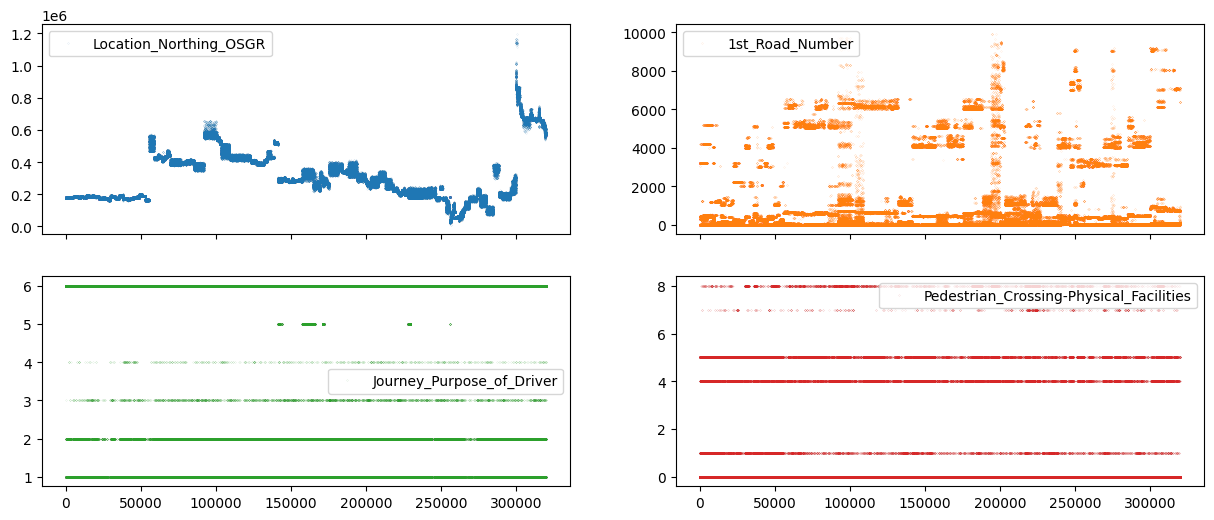

In [ ]:
df[["Location_Northing_OSGR", "1st_Road_Number",
      "Journey_Purpose_of_Driver", "Pedestrian_Crossing-Physical_Facilities"]].plot(
    lw=0, marker=".", subplots=True, layout=(-1, 2), markersize=0.1, figsize=(15, 6));

In the top row, we can see features with continuous values (e.g. seemingly any number from the number line), while in the bottom row we have features with discrete values (e.g. 1, 2, 3 but not 2.34).

<p>While there are many ways we could explore our features for particular patterns, let's simplify our option by deciding that we treat features with less than 25 unique features as discrete or ordinal features, and the other features as continuous features.

In [ ]:
cols_continuous = df.select_dtypes(include="number").nunique() >= 25

In [ ]:
cols_continuous

Vehicle_Reference_df_res                        True
Vehicle_Type                                   False
Towing_and_Articulation                        False
Vehicle_Manoeuvre                              False
Vehicle_Location-Restricted_Lane               False
Junction_Location                              False
Skidding_and_Overturning                       False
Hit_Object_in_Carriageway                      False
Vehicle_Leaving_Carriageway                    False
Hit_Object_off_Carriageway                     False
1st_Point_of_Impact                            False
Was_Vehicle_Left_Hand_Drive?                   False
Journey_Purpose_of_Driver                      False
Sex_of_Driver                                  False
Age_of_Driver                                   True
Age_Band_of_Driver                             False
Location_Easting_OSGR                           True
Location_Northing_OSGR                          True
Longitude                                       True
Latitude                                        True
Police_Force                                    True
Accident_Severity                              False
Number_of_Vehicles                             False
Number_of_Casualties                           False
Day_of_Week                                    False
Local_Authority_(District)                      True
1st_Road_Class                                 False
1st_Road_Number                                 True
Road_Type                                      False
Speed_limit                                    False
Junction_Detail                                False
2nd_Road_Number                                 True
Pedestrian_Crossing-Human_Control              False
Pedestrian_Crossing-Physical_Facilities        False
Light_Conditions                               False
Weather_Conditions                             False
Road_Surface_Conditions                        False
Special_Conditions_at_Site                     False
Carriageway_Hazards                            False
Urban_or_Rural_Area                            False
Did_Police_Officer_Attend_Scene_of_Accident    False
Vehicle_Reference_df                            True
Casualty_Reference                              True
Casualty_Class                                 False
Sex_of_Casualty                                False
Age_of_Casualty                                 True
Age_Band_of_Casualty                           False
Casualty_Severity                              False
Pedestrian_Location                            False
Pedestrian_Movement                            False
Car_Passenger                                  False
Bus_or_Coach_Passenger                         False
Pedestrian_Road_Maintenance_Worker             False
Casualty_Type                                  False
Casualty_Home_Area_Type                        False
dtype: bool

#### 3.2.1. CONTINUEOUS FEATURES

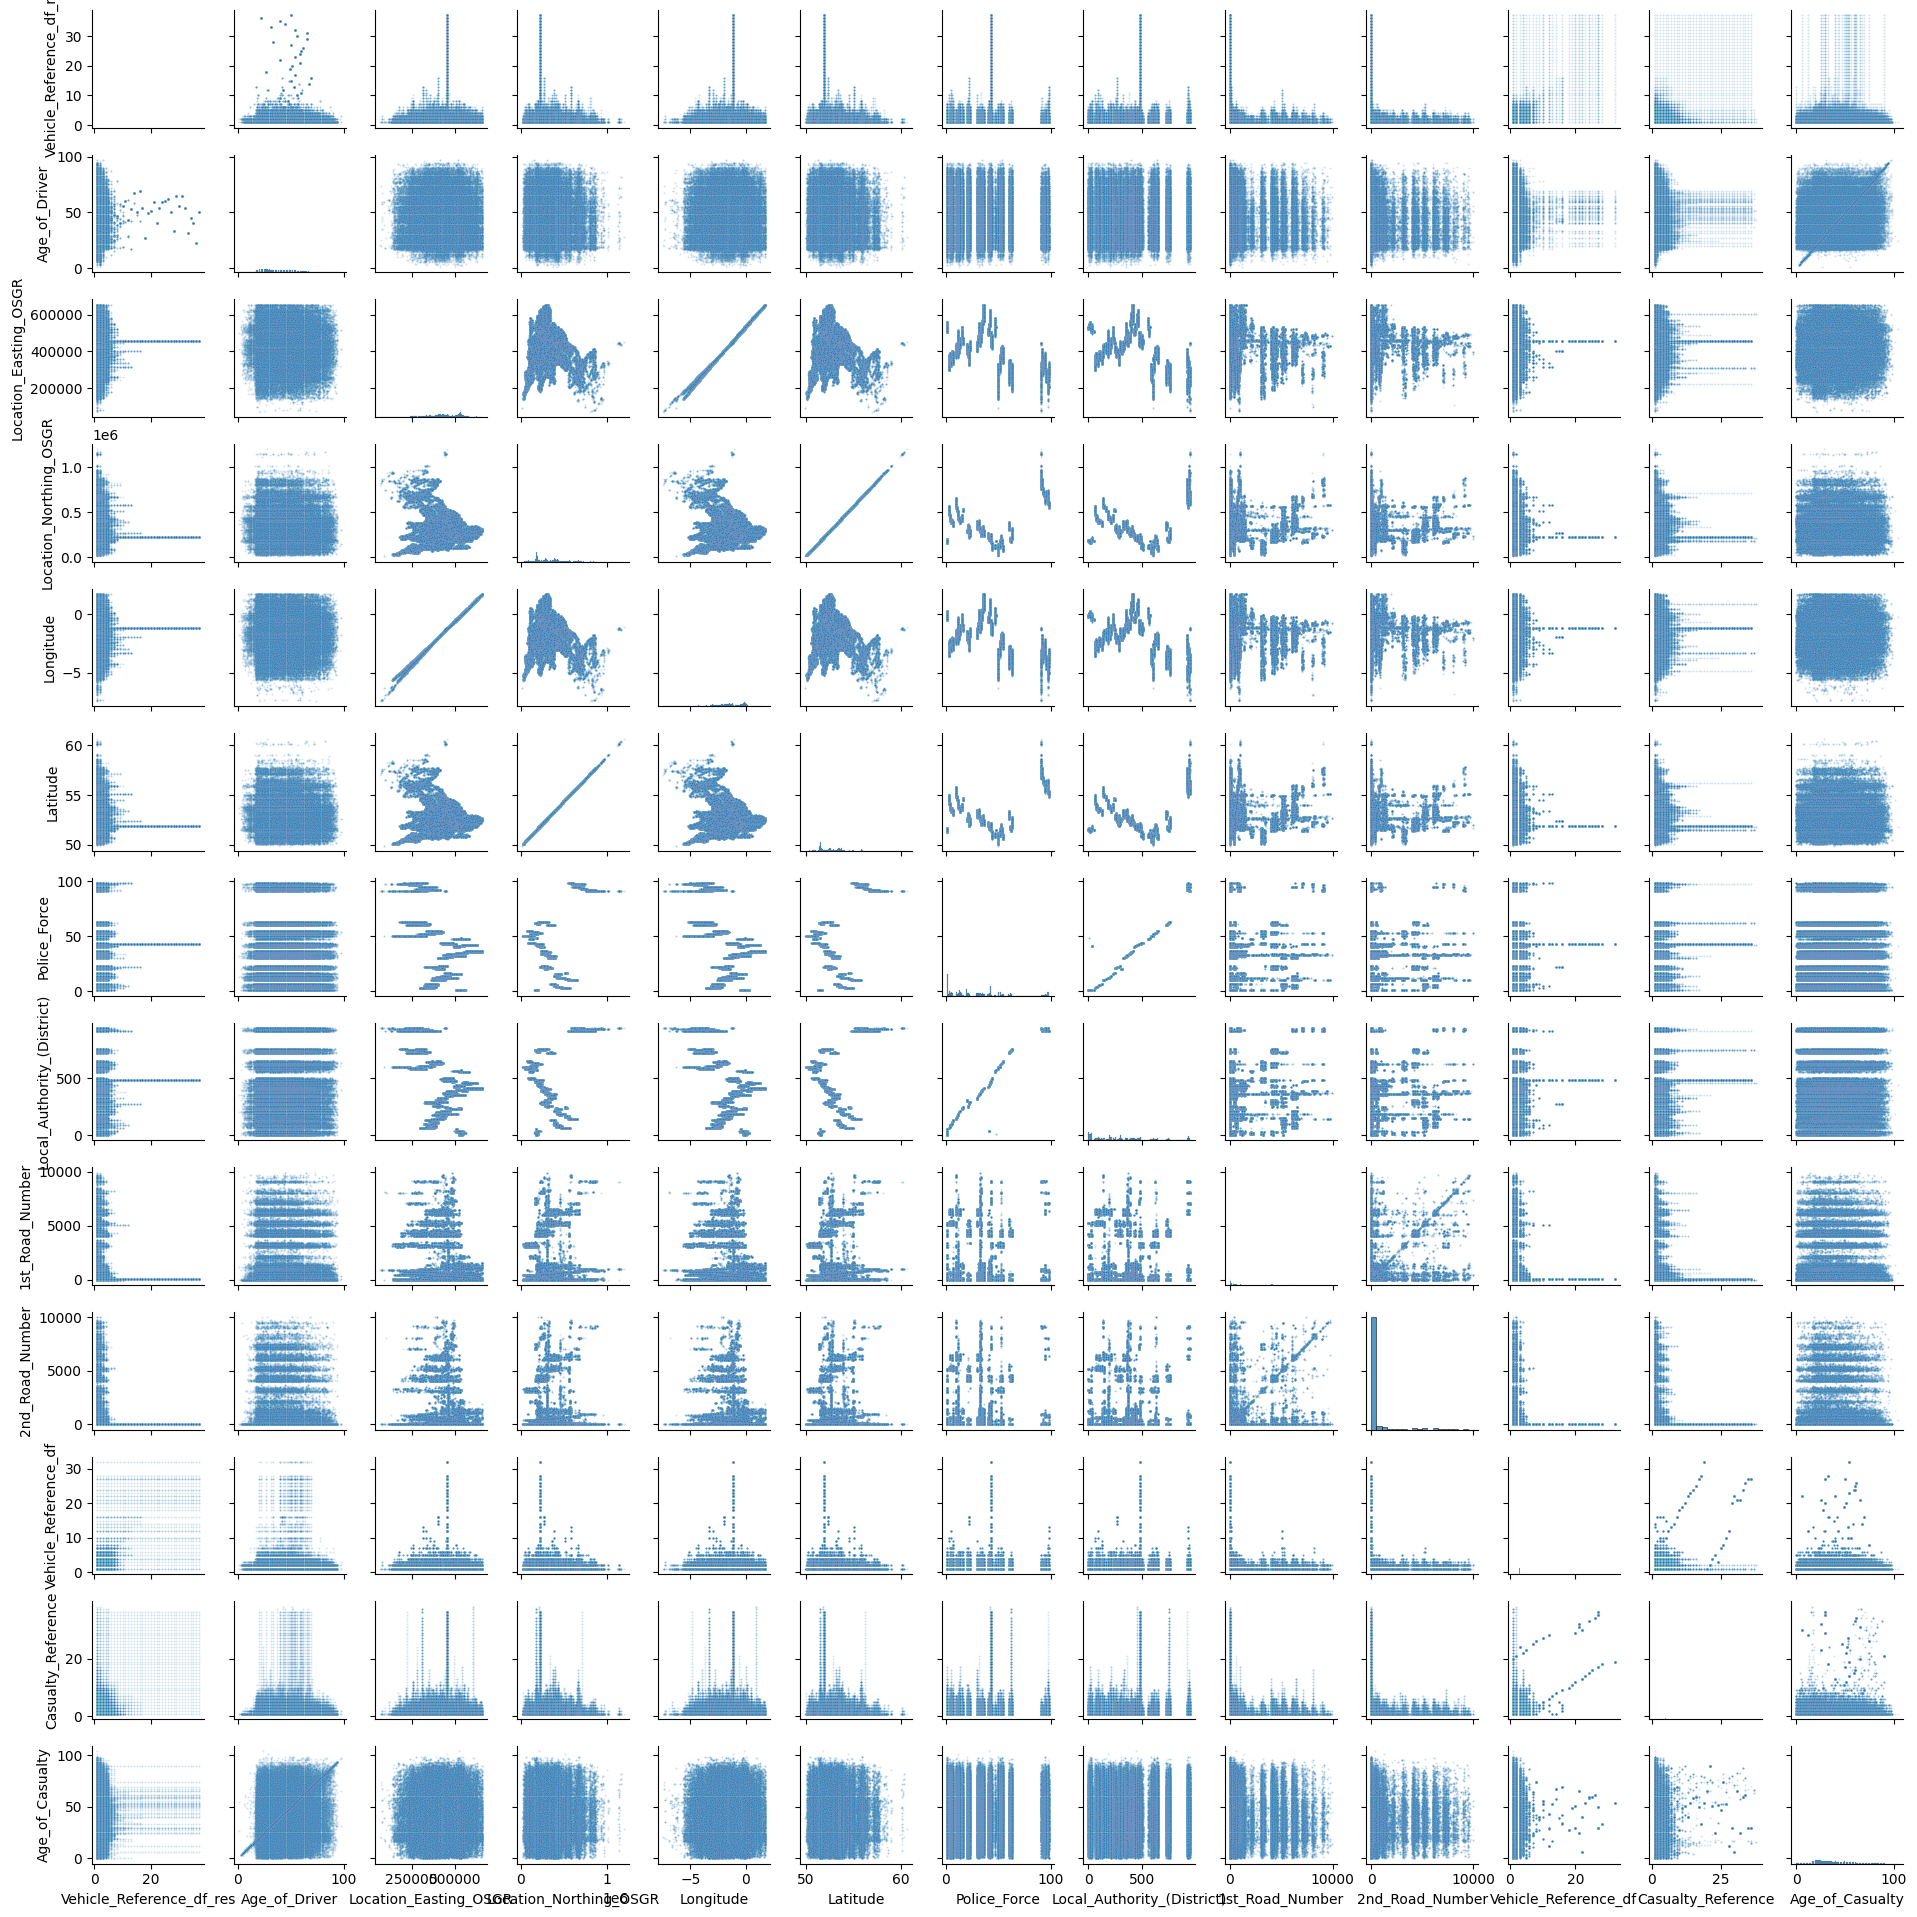

In [ ]:
df_continuous = df[cols_continuous[cols_continuous].index]
sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": 0.2});

There seems to be a strange relationship between a few features in the top left corner. Location_Easting_OSGR and Longitude, as well as Location_Easting_OSGR and Latitude seem to have a very strong linear relationship.

#### 3.2.2. DISCRITE AND ORDINAL FEATURES

In [ ]:
df_discrete = df[cols_continuous[~cols_continuous].index]
df_discrete.shape

(319790, 42)

We are going to use stripplot for visualization
<br>
<p>What is a stripplot?</p>
<p>A strip plot is a single-axis scatter plot that is used to visualise the distribution of many individual one-dimensional values. The values are plotted as dots along one unique axis, and the dots with the same value can overlap.
</p>

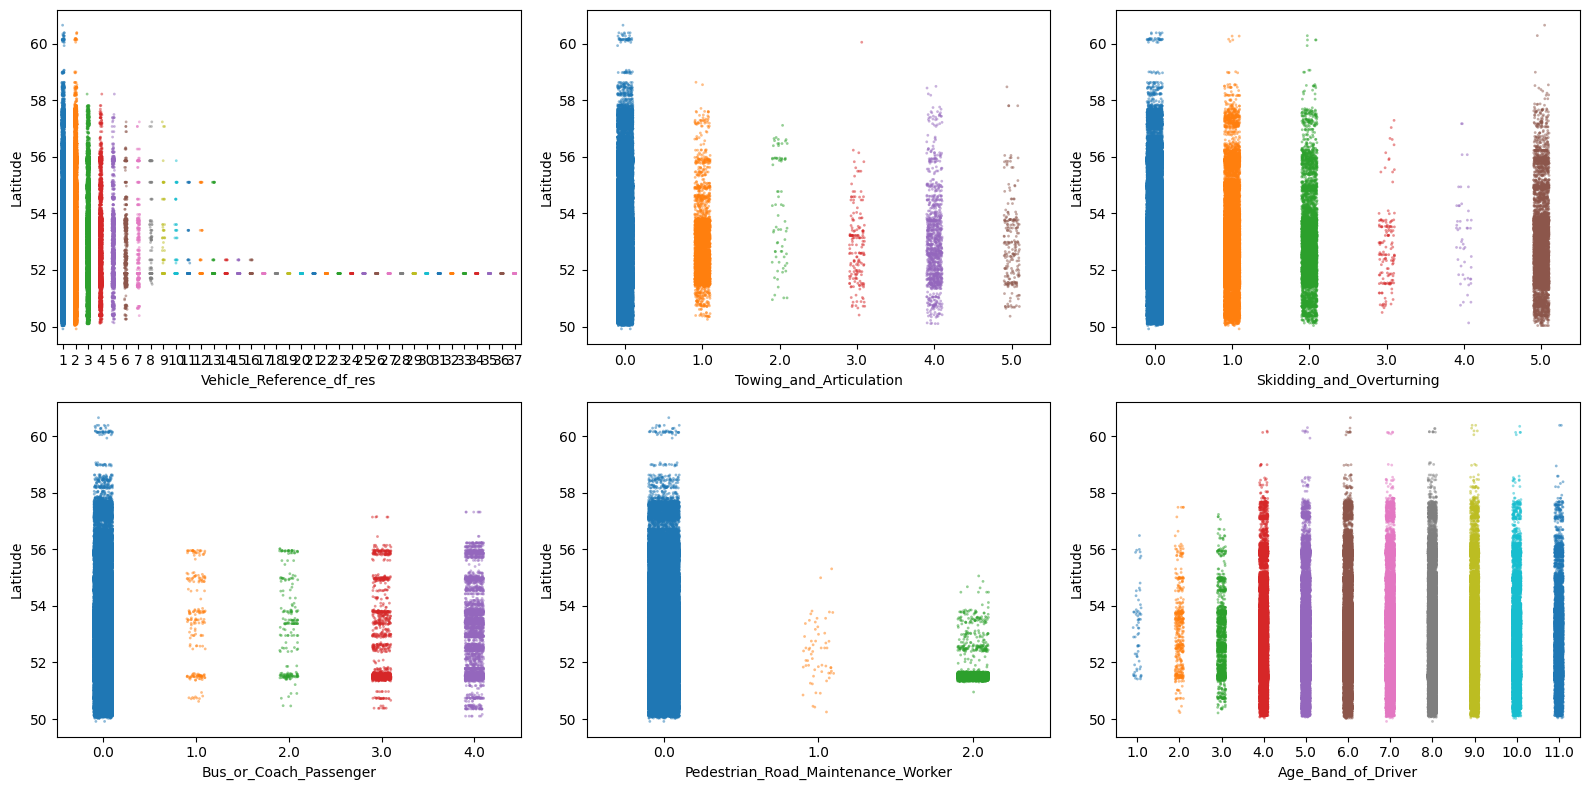

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))
selected_features = ["Vehicle_Reference_df_res", "Towing_and_Articulation",
                     "Skidding_and_Overturning", "Bus_or_Coach_Passenger",
                     "Pedestrian_Road_Maintenance_Worker", "Age_Band_of_Driver"]
for col, ax in zip(selected_features, axes.ravel()):
    sns.stripplot(data=df, x=col, y=df["Latitude"], ax=ax,
                  hue=col, palette="tab10", size=2, alpha=0.5, legend=False)

plt.tight_layout()

### 3.3. FEATURE RELATIONSHIPS

In [ ]:
df_selected = df.select_dtypes(include = ['float64','int64'])
df_corr = df_selected.corr(method="pearson")

Note: Depending on the dataset and the kind of features (e.g. ordinal or continuous features) you might want to use the spearman method instead of the pearson method to compute the correlation. Whereas the Pearson correlation evaluates the linear relationship between two continuous variables, the Spearman correlation evaluates the monotonic relationship based on the ranked values for each feature. And to help with the interpretation of this correlation matrix, let's use seaborn's .heatmap() to visualize it.

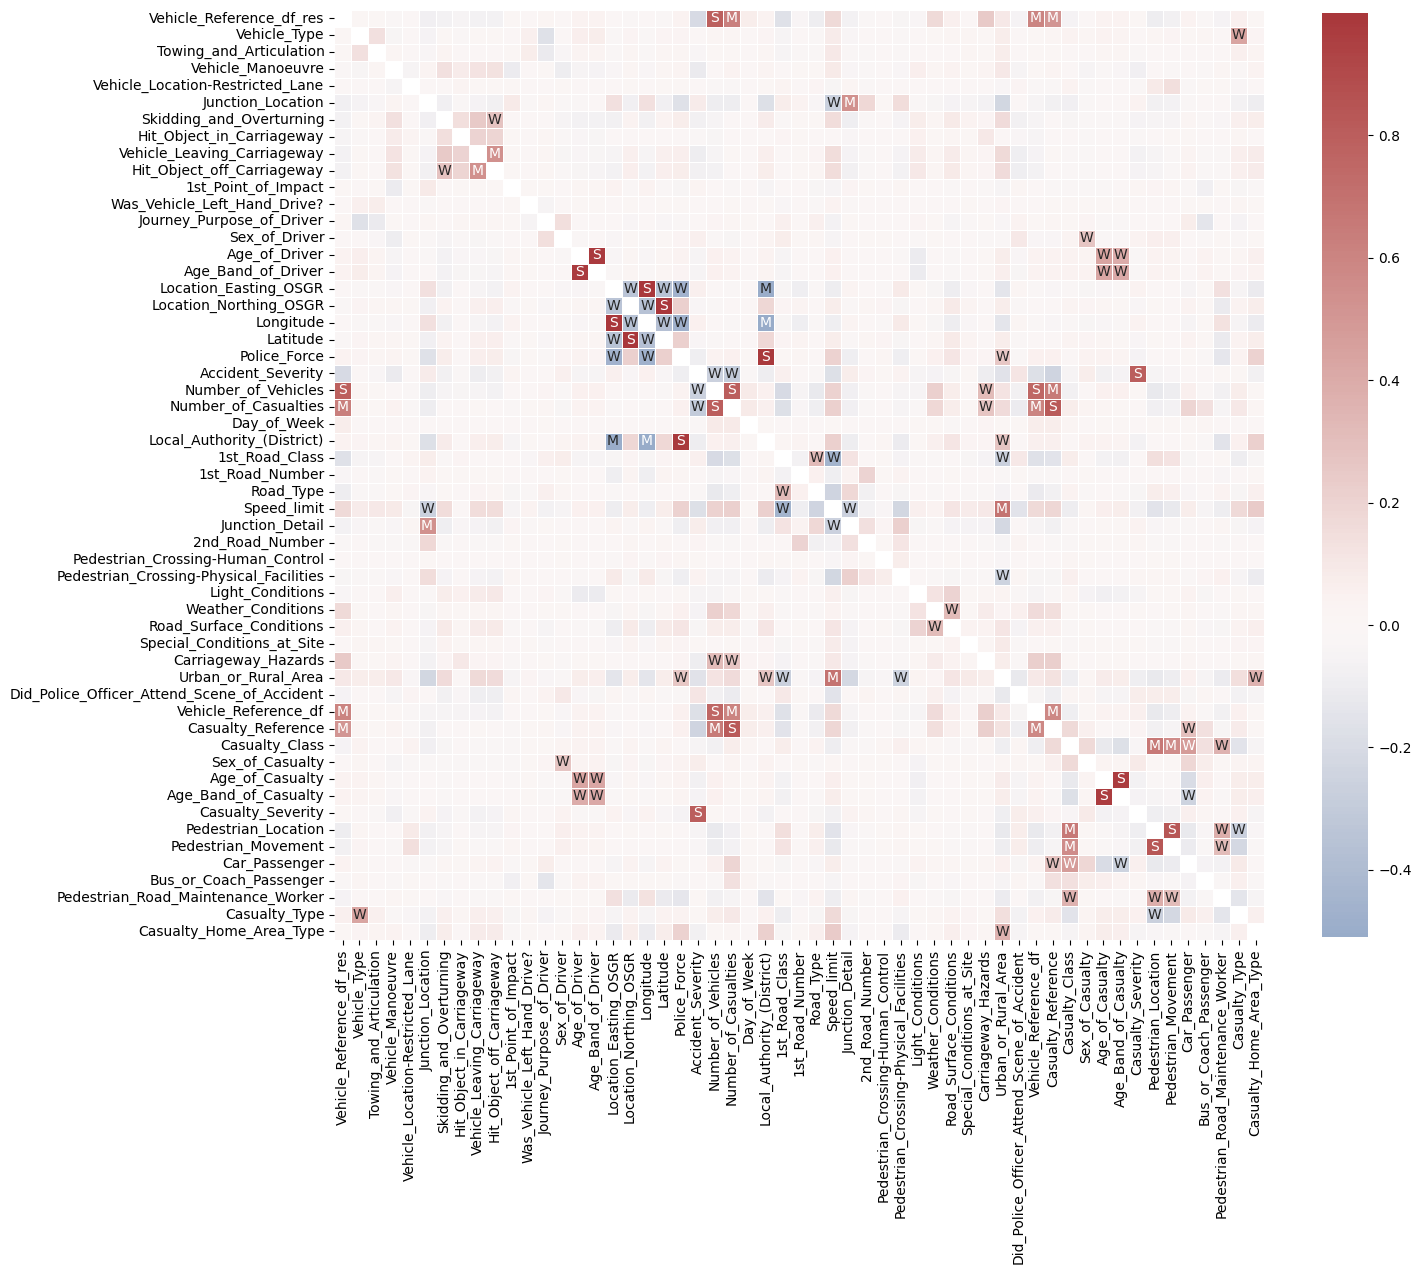

In [ ]:
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});